 KSP Problem Statement Solution
---
Overview: Convert the geocentric data to heliocentric, using cosine law, to calculate the required parameters. Then fit a curve to the data using polar equation of conic and plot the trajectory. 

We begin by importing all the necessary libraries in python.

In [1]:
#Libraries:
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

Next, the given dataset is unpacked using the 'loadtxt' function of numpy and stored in three different variables.




In [2]:
time, radius, angle = np.loadtxt('CometData.csv', delimiter=',', dtype='f', unpack = True)

In the triangle formed by sun, earth and comet, data about earth-comet distance and sun-earth-comet angle have been given. We already know beforehand that the earth-sun distance is always 1 AU.

Hence cosine law can be used: 

$r_{sun} = \sqrt{1 + r_{earth}^2 -2r_{earth}{\cos}(\theta)}$ 

${\theta}_{ces} = {\cos}^{-1}\left(\frac{1 + r_{sun}^2-r_{earth}^2}{2r_{sun}}\right)$

Where $r_{sun}$ denotes the distance of comet from Sun, $r_{earth}$ denotes the ditance of comet from Earth and ${\theta}_{ces}$ denotes the earth-sun-comet angle.

Two functions are defined to operate on the data.

The first function 'r_sun' uses cosine law to calculate the heliocentric distance of the comet, taking $r_{earth}$ and given angle $\theta$ as parameters. The second function 'angle_esc' calculates ${\theta}_{ces}$.

In [3]:
#Cosine law functions:
def r_sun(r,theta):
    return np.sqrt(1+np.square(r)-2*np.multiply(r,np.cos(theta)))

def angle_ces(re,rs):
    return np.arccos(np.divide((1+np.square(rs)-np.square(re)),(2*rs)))

In [4]:
geo_to_helio_radius = r_sun(radius,angle)  #Calculating heliocentric distance of comet

In order to calculate the angle made by the comet with the reference axis, a subtlety needs to be taken care of, to account for the fact that arccos gives values in $[0,\pi]$ only as opposed to $[0,2\pi]$ or $[-\pi,\pi]$

When the given angle is greater than zero then the angle ${\theta}_{ces}$ will be positive, i.e anti-clockwise, and negative (clockwise) when the given angle is less than zero. 

The polar angle will be given by ${\omega}t - {\theta}_{ces}$.  

In [5]:
ces_angle = angle_ces(radius,geo_to_helio_radius)   #Calculating Earth-Sun_Comet angle
ces_angle[np.where(angle%(2*np.pi)>np.pi)] = ces_angle[np.where(angle%(2*np.pi)>np.pi)]*-1

geo_to_helio_angle = (2*np.pi*time)%(2*np.pi) - ces_angle

Finally, we move on to making a plot of the comet's trajectory and calculating the required values.

The equation of a conic section in polar coordinates is given by:

$r({\theta}) = \frac{r_0}{1+e{\cos}({\theta}-{\theta}_0)}$

For the fit function we use the following function:

$\frac{1}{r({\theta})} = r_{inv}(1+e{\cos}({\theta}-{\theta}_0))$

where $r_{inv}=\frac{1}{r_0}$



In [6]:
def invr(theta,r0,e,t0):
    return (r0*(1-e*np.cos(theta-t0)))

p_opt, p_cov = cf(invr,geo_to_helio_angle,1/geo_to_helio_radius)

The fit parameters have been obtained. The value of eccentricity comes out to be 0.92 (elliptical orbit) and the time period comes out to be 89 years

Note that the time period has been calculated using kepler's third law

$T^2 \propto a^3$ 

$(\frac{T_{comet}}{T_{earth}})^2 = (\frac{a_{comet}}{a_{earth}})^3$

Since $T_{earth}$ is 1 year and $a_{earth}$ is 1 AU, we get

$T_{comet} = a_{comet}^{1.5}$ years.



In [7]:
r0 = 1/p_opt[0]
e = p_opt[1]      #We see that e=0.92, implying that the orbit is elliptical

a = r0/(1-e*e)    #Semi-major axis = 20AU

#Time period:
T = a**(1.5)

print("The eccentricity of the comet's orbit is {}.".format(e))
print("The time period of the comet's orbit is {} years.".format(T))

The eccentricity of the comet's orbit is 0.9200007074827972.
The time period of the comet's orbit is 89.44391490302242 years.


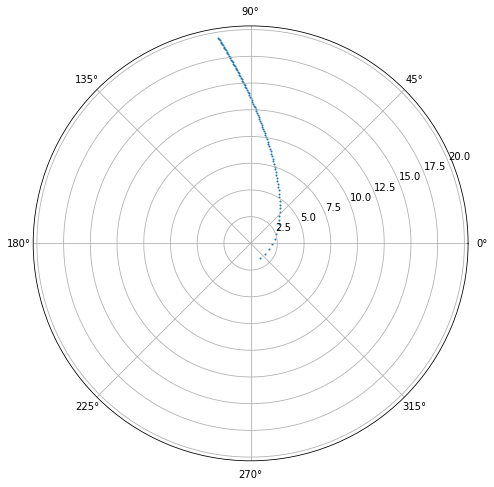

In [8]:
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = fig.add_subplot(projection='polar')
c = ax.scatter(geo_to_helio_angle, geo_to_helio_radius,s=1)